<a href="https://colab.research.google.com/github/sudhakarmlal/MachineLearning/blob/master/EVAAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ***EVA Assignment1***
   
   

**Description:The Assignment is about detecting various features of the image using OpenCV **

**The following kernels or feature extractors would be covered as part of this assignment**


Horizontal Edge Detector


45 Degree Angle Detector (either)


Blur Kernel


Sharpen Kernel


Identity function (doesn't do anything)



**Import necessary packages**

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt



**Define a function to load the image from a URL **

In [0]:
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

**Fetch the image using url_to_image function** 

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

**Display the image **

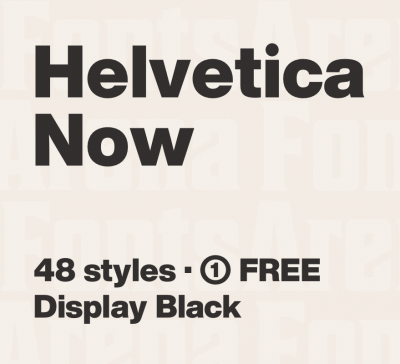

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

**Convert the Image to Gray scale  by using OpenCV canny function.Take image size as 100x200** 

In [0]:
edges = cv2.Canny(image,100,200)

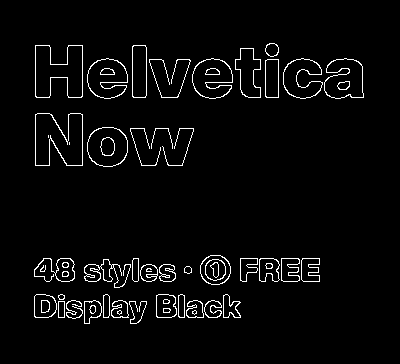

In [6]:
##The Grey Scale image
cv2_imshow(edges)

**Vertical Edge Detector**

For a vertical Edge detection  3x3 filter we need to use values only for the  left or right columns and use 0 for the middle column.

Something like below:  

$\begin{bmatrix}-1 & 0& 1\\-1 & 0&1 \\ -1 & 0&1 \end{bmatrix}$

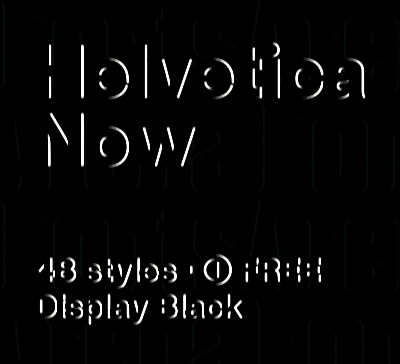

In [7]:
#kernel = np.ones((3,3),np.float32)/25

# Vertical Edge detection
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Horizontal Edge Detector**

For a horizontal Edge detection  3x3 filter we need to use values only for the  top or both rows with  0 values for the  middle row

Something like below:  

$\begin{bmatrix}1 & 1& 1\\0 & 0&0 \\ -1 & -1&-1 \end{bmatrix}$

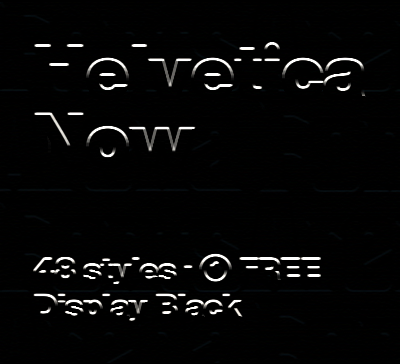

In [8]:
# Horizontal Edge Detection
kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**45 Degree Angle Detector **

For a 45 Degree Angle detection  3x3 filter we need to use values same values for the diagonal  and symmetric values on either side of the diagonals

Something like below:  

$\begin{bmatrix}-1 & -1& 2\\-1 & 2&-1 \\ 2 & -1&-1 \end{bmatrix}$

Note:The diagonal values are 2 and the values on either side of the diagonal is -1

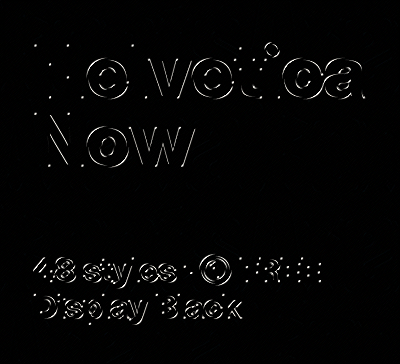

In [9]:
# 45 degrees angle detection
kernel = np.float32([[-1,-1,2],[-1,2,-1],[2,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**-45 Degree Angle Detector **

For a  -45 Degree Angle detection  3x3 filter we need to use values same values for the other possible diagonal (i.e other than what being used in the other example)  and symmetric values on either side of the diagonals

Something like below:  

$\begin{bmatrix}2 & -1& -1\\-1 & 2&-1 \\ -1 & -1&2 \end{bmatrix}$

Note:The diagonal values are 2 and the values on either side of the diagonal is -1

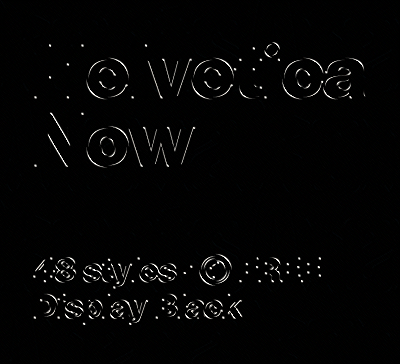

In [10]:
#-45 Degree convolution
kernel = np.float32([[2,-1,-1],[-1,2,-1],[-1,-1,2]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Blur Kernel **

For a  Bluer  3x3 filter we need to use fraction of each of the values in the 3x3

Something like below:  

$\begin{bmatrix}1/24 & 1/24 &  1/24\\1/24 & 1/24& 1/24 \\ 1/24 & 1/24& 1/24 \end{bmatrix}$

Note:Each of values are 1/24 which makes the output blur after convolution

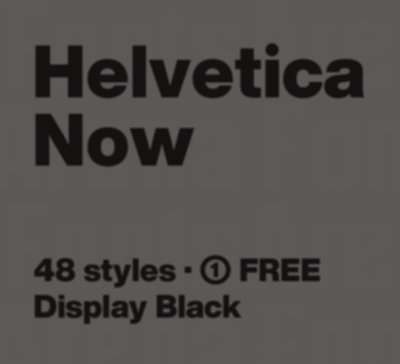

In [11]:
# Blur Matrix(1/24)
kernel = np.float32([[1/24,1/24,1/24],[1/24,1/24,1/24],[1/24,1/24,1/24]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Blur Kernel: Less Intensity(1/9) **
 
We can reduce the intensity of the  3x3 blur filter by taking a greater fraction value e.g 1/9

Something like below:  

$\begin{bmatrix}1/9 & 1/9 &  1/9\\1/9 & 1/9& 1/9 \\ 1/9 & 1/9& 1/9 \end{bmatrix}$

Note:Each of values are 1/9  as compared to 1/24 in the above example which makes the output less blur

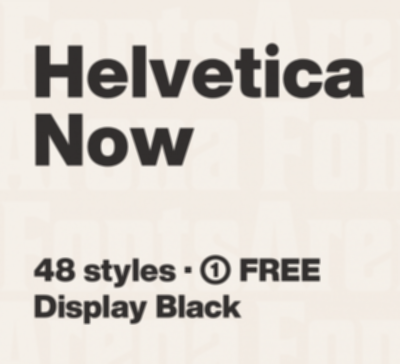

In [12]:
# Blur Matrix(1/9)
kernel = np.float32([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Sharpen Kernel **

The sharpen kernel emphasizes differences in adjacent pixel values. This makes the image look more vivid.
 
Something like below:  

$\begin{bmatrix}0 & -1 &  0\\-1 & 5& -1 \\ 0 & -1& 0 \end{bmatrix}$

Note:The values adjacent to -1 are zero which means this filter emphasizes difference between neighbouring values.

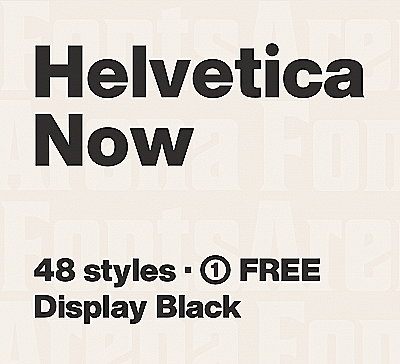

In [13]:
#Sharpen Filter
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Identity Kernel **

The Identity kernel  only considers central  pixel value for the 3x3 convolution.With no other boundary values to have the impact on the 3x3 convolution.The makes the output of the convolution same as that of input image.

Sometimes the Identity Kernel is also known as **Do nothing Kernel**
 
The 3x3 matrix for an Identity Kernel will be like below:  

$\begin{bmatrix}0 & 0 &  0\\0 & 1& 0 \\ 0 & 0& 0 \end{bmatrix}$

Note:It has only central value i.e  1 .Rest all other values are 0

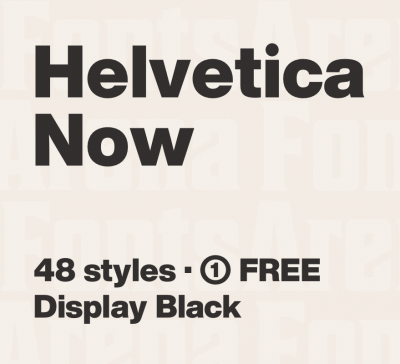

In [14]:
# Identity or do nothing filter
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)